<a href="https://colab.research.google.com/github/ignyz/Numerical-methods-and-algorithms/blob/main/AmbersConvayorMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2 
import numpy as np
import os
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
 
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]
 
    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
 
    return cv2.resize(image, dim, interpolation=inter)

In [42]:
from google.colab import drive
drive.mount('/content/gdrive')
 
!ls -lf /content/gdrive/My\ Drive/Bakalauras/Data/149ambers
 
import sys
sys.path.append('/content/gdrive/My Drive/Bakalauras/Data/149ambers')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
1-1.jpg   20-3.jpg  40-2.jpg  63-2.jpg	87-2.jpg   106-2.jpg  126-1.jpg
1-2.jpg   20-4.jpg  41-1.jpg  64-1.jpg	87-3.jpg   106-3.jpg  126-2.jpg
1-3.jpg   21-1.jpg  41-2.jpg  64-2.jpg	87-4.jpg   106-4.jpg  126-3.jpg
1-4.jpg   21-2.jpg  41-3.jpg  64-3.jpg	87-5.jpg   107-1.jpg  126-4.jpg
2-1.jpg   21-3.jpg  41-4.jpg  65-1.jpg	88-1.jpg   107-2.jpg  126-5.jpg
2-2.jpg   21-4.jpg  42-1.jpg  65-2.jpg	88-2.jpg   108-1.jpg  127-1.jpg
3-1.jpg   22-1.jpg  42-2.jpg  65-3.jpg	88-3.jpg   108-2.jpg  127-2.jpg
3-2.jpg   22-2.jpg  43-1.jpg  66-2.jpg	88-4.jpg   108-3.jpg  127-3.jpg
3-3.jpg   22-3.jpg  43-2.jpg  66-1.jpg	89-1.jpg   109-1.jpg  127-4.jpg
4-1.jpg   22-4.jpg  44-1.jpg  67-4.jpg	89-2.jpg   109-2.jpg  127-5.jpg
4-2.jpg   23-1.jpg  44-2.jpg  67-1.jpg	89-3.jpg   110-1.jpg  128-1.jpg
4-3.jpg   23-2.jpg  44-3.jpg  67-2.jpg	90-1.jpg   110-2.jpg  128-2.jpg
5-1.jpg   23-3.jp

151-1.jpg


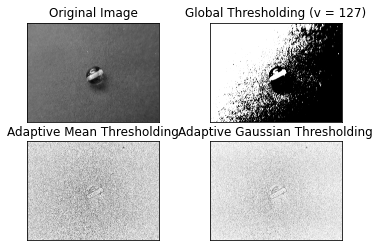

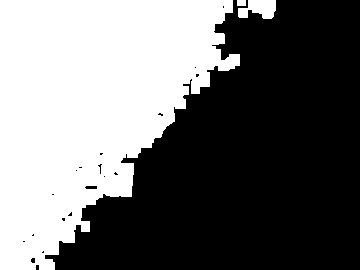

152-1.png


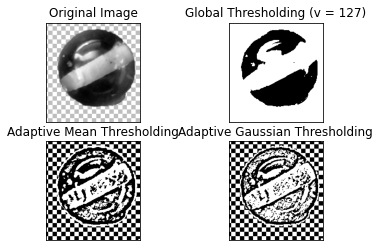

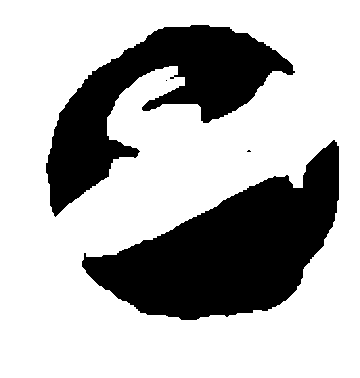

In [51]:
from google.colab import files
from PIL import Image, TiffImagePlugin
import os.path
import pathlib
import numpy as np
from PIL import Image
from IPython.display import Image, display
from scipy import ndimage
from PIL import Image as Img
from PIL import ImageTk

# Kodo dalis skirta nuskaityti nuotraukas, o tas nuotraukas sumazinti rezoliucija ir issaugoti binary formatu, jeigu ta nuotrauka
# egzistuoja jos darkartą nesaugos į binary formą kad sutaupytume laiko ir vietos size buvo sumažintas iki 360 pločio su Automatiniu aspect ratio
 
# check = util.img_as_bool(data.checkerboard())
 
folder="/content/gdrive/My Drive/Bakalauras/Data/149ambers"
 
lst = os.listdir(folder)
lst = sorted( lst, key=lambda a: int(a.split(".")[0].split("-")[0]) )
 
for filename in lst:
    # img = cv2.imread(os.path.join(folder,filename))
    # if img is not None:
    file_path_check0 = pathlib.Path(os.path.join(folder,filename))
    if file_path_check0.exists() :
      write_binary_name = filename.split(".")[0]  + ".bin"
      file_path_check1 = pathlib.Path("/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/" + write_binary_name)
 
      if file_path_check1.exists() != True :
        # images.append(img)
        print(filename)
        
        img = cv2.imread('/content/gdrive/My Drive/Bakalauras/Data/149ambers/' + filename, 2) 
 
        # print(img) # patikrinimas jei None - tai reiskia blogai nusiskaitė, jei yra duomenys tada reiskiasi yra nuskaitytas
        ret, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
 
        # Konvertuojame į binarinę formą # binarines formos array kuris bus panaudojamas duomenims ir ju analizei
        bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  
        bw_img_rs = ResizeWithAspectRatio(bw_img, width=360) # Resising by width keeping the same aspect ratio; Pastraipa skirta atvaizduoti binary gintara
                                              # Resize H: 480 W: 360
        # cv2_imshow(bw_img_rs)

        blur = cv2.GaussianBlur(bw_img_rs, (3,3), 0)
        thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
        # thresh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
        
        ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
        th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
        titles = ['Original Image', 'Global Thresholding (v = 127)',
                    'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
        images = [img, th1, th2, th3]
        for i in range(4):
            plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
            plt.title(titles[i])
            plt.xticks([]),plt.yticks([])
        plt.show()
        # Filter using contour area and remove small unnesecary noise

        cnts = cv2.findContours(d, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        for c in cnts:
            area = cv2.contourArea(c)
            if area < 5500:
                cv2.drawContours(thresh, [c], -1, (0,0,0), -1)

        # Morph close and invert image
        
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
        close = 255 - cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

        des = cv2.bitwise_not(close)
        contour,hier = cv2.findContours(des,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contour:
            cv2.drawContours(des,[cnt],0,255,-1)

        bw_img_rs = cv2.bitwise_not(des)

        # cv2_imshow( thresh)
        # cv2_imshow(bw_img_rs)
        # cv2.waitKey()

        with open("/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/" + write_binary_name  , "wb")  as outfile:  
          outfile.write(bw_img_rs)  # Write your data 
        # print(close)

        # PILimage = Image.fromarray(close)
        PILimage = Img.fromarray(bw_img_rs)

        PILimage.save('/content/gdrive/My Drive/Bakalauras/Data/image_from_binary/' + filename )
        # Image.fromarray(d).show()

        # from IPython.display import Image, display
        display(Image('/content/gdrive/My Drive/Bakalauras/Data/image_from_binary/'+filename))
 
 
 
    # img = cv2.imread('/opt/data/python_code/gesture.jpg', 0)

In [38]:
import numpy as np
from PIL import Image
from scipy import ndimage
from IPython.display import Image as Imag, display
import math

def smallestbox(a): # nukerpame nereikalingas gintaro dalis.
            r = a.any(1)
            if r.any():
                m,n = a.shape
                c = a.any(0)
                out = a[r.argmax():m-r[::-1].argmax(), c.argmax():n-c[::-1].argmax()]
            else:
                out = np.empty((0,0),dtype=bool)
            return out

def dotto(a,x,y): # 
    r = a
    r[x][y] = 0;
    c,v = r.shape
    if c > x+1:
      r[x+1][y] = 255
    if c > x-1 and x-1 >= 0:
      r[x-1][y] = 255
    if c > x-2 and x-2 >= 0:
      r[x-1][y] = 0
    return r 
# kodo dalis skirta nuskaityti binarinėj formoje esančius duomenis. Kad išsaugotus duomenis perpanaudotume vėl.


# Define width and height
w, h = 360, 480
w1, h1 = 360 , 270


folder="/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/"
 
lst = os.listdir(folder)
lst = sorted( lst, key=lambda a: int(a.split(".")[0].split("-")[0]) )
 
for filename in lst:
  file_path_check0 = pathlib.Path(os.path.join(folder,filename))

  if file_path_check0.exists() :
      # image_bin_file = "/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/88-4.bin" #file_path_check0;
      image_bin_file = file_path_check0
      #Nuskaitome bin failą nuotraukos ir atidarę suformatuojame aukštį ir plotį.
      # image_bin_file = '/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/10-1.bin'
      print(image_bin_file)
      with open( image_bin_file  , mode='rb') as f:
          if os.stat(image_bin_file).st_size > 100000:
            d = np.fromfile(f,dtype=np.uint8, count=w*h).reshape(h,w)
          else:
            d = np.fromfile(f,dtype=np.uint8,count=w1*h1).reshape(h1,w1)

      write_image_name = filename.split(".")[0]  + ".jpg"
      if (len(d)>0):
        d = cv2.bitwise_not(d) # invertuojam nes kad apskkaiciuoti mases centra geliausia kad butu pats gintaras 
        # d = smallestbox(d)# nukerpame nereikalingas tuscias nuotraukos, aplink gintara dalis.

        # print(ndimage.measurements.center_of_mass(d))
        # print(d)

        kernel = np.ones((5,5),np.uint8)
        erosion = cv2.erode(d,kernel,iterations = 1)



        # d = smallestbox(d)
        # c1, c2 = ndimage.measurements.center_of_mass(d)
        # if not math.isnan(c1) and not math.isnan(c2):
        #   print(int(c1), int(c2))
        #   d = dotto(d,int(c1) , int(c2) )

        #  # d = cv2.bitwise_not(d)
        #   plt.imshow(d, interpolation='nearest')
        #   plt.show()

        # write_image_name = filename.split(".")[0]  + ".jpg"
        erosion = smallestbox(erosion)

        
        c1, c2 = ndimage.measurements.center_of_mass(erosion)
        if not math.isnan(c1) and not math.isnan(c2):
          print(int(c1), int(c2))
          erosion = cv2.bitwise_not(erosion)
          # erosion = dotto(erosion,int(c1) , int(c2) )
          PILimage = Image.fromarray(erosion)
          PILimage.save('/content/gdrive/My Drive/Bakalauras/Data/image_from_binary/' + write_image_name)
          # plt.imshow(erosion, interpolation='nearest')
          # plt.show()

        # tophat = cv2.morphologyEx(d, cv2.MORPH_CLOSE, kernel)
        # tophat = smallestbox(tophat)

        # c1, c2 = ndimage.measurements.center_of_mass(tophat)
        # if not math.isnan(c1) and not math.isnan(c2):
        #   print(int(c1), int(c2))

        #   tophat = dotto(tophat,int(c1) , int(c2) )
        #   plt.imshow(tophat, interpolation='nearest')
        #   plt.show()
        # PILimage = Image.fromarray(d)
        # PILimage.save('/content/gdrive/My Drive/Bakalauras/Data/image_from_binary/result1.png')
        # # Image.fromarray(d).show()
        # display(Imag('/content/gdrive/My Drive/Bakalauras/Data/image_from_binary/result1.png'))


/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/1-1.bin
64 73
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/1-2.bin
102 99
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/1-4.bin
91 96
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/1-3.bin
91 66
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/2-1.bin
153 80
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/2-2.bin
146 94
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/3-1.bin
61 47
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/3-2.bin
85 90
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/3-3.bin
77 96
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/4-1.bin
30 78
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/4-2.bin
54 72
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/4-3.bin
60 55
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/5-1.bin
75

/usr/local/lib/python3.6/dist-packages/scipy/ndimage/measurements.py:1359: RuntimeWarning: invalid value encountered in double_scalars
  for dir in range(input.ndim)]



17 14
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/19-4.bin
191 105
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/20-1.bin
164 110
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/20-2.bin
147 104
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/20-3.bin
155 114
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/20-4.bin
159 108
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/21-1.bin
149 102
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/21-2.bin
109 108
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/21-3.bin
157 117
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/21-4.bin
131 91
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/22-1.bin
121 83
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/22-2.bin
121 134
/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/22-3.bin
125 128
/content/gdrive/My Drive/Bakalauras

In [ ]:
 # hexadecimal and binary dump of image file data
# modified to work with Python30
 
import binascii
 
image_file = '/content/gdrive/My Drive/Bakalauras/Data/binary_data_of_ambers/1-1.bin'
try:
    # pick an image file you have in the working directory
    # or give the full file path ...
    image_file1 = 'py.ico'
    fin = open(image_file, "rb")
    data = fin.read()
    fin.close()
except IOError:
    print("Image file %s not found" % imageFile)
    raise SystemExit
 
# convert every byte of data to the corresponding 2-digit hexadecimal
hex_str = str(binascii.hexlify(data))
# now create a list of 2-digit hexadecimals
hex_list = []
bin_list = []
for ix in range(2, len(hex_str)-1, 2):
    hex = hex_str[ix]+hex_str[ix+1]
    hex_list.append(hex)
    bin_list.append(bin(int(hex, 16))[2:])
 
#print(bin_list)
bin_str = "".join(bin_list)
print(bin_str)

1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111